In [1]:
import numpy as np
import pandas as pd

In [4]:
import os
for dirname,filenames in os.walk('/kaggle/input'):
    for filename in filenames :
        print(os.path.join(dirname,filename))


In [6]:
df_breweries = pd.read_csv('C:/Users/HOME/Desktop/8차/통계학 세미나/팀플/잠재요인 돌릴때 쓰는 데이터/breweries.csv',
                           index_col = 'id')

df_breweries.head()

,name,city,state,country,notes,types
id,,,,,,
19730,Brouwerij Danny,Erpe-Mere,NaN,BE,No notes at this time.,Brewery
32541,Coachella Valley Brewing Co,Thousand Palms,CA,US,No notes at this time.,"Brewery, Bar, Beer-to-go"
44736,Beef 'O' Brady's,Plant City,FL,US,No notes at this time.,"Bar, Eatery"
23372,Broadway Wine Merchant,Oklahoma City,OK,US,No notes at this time.,Store
35328,Brighton Beer Dispensary (DUPLICATE),Brighton,GB2,GB,Duplicate of https://www.beeradvocate.com/beer...,"Bar, Eatery"


In [8]:
df_beers = pd.read_csv('C:/Users/HOME/Desktop/8차/통계학 세미나/팀플/잠재요인 돌릴때 쓰는 데이터/beers.csv',
                      index_col='id')
df_beers.head()

,name,brewery_id,state,country,style,availability,abv,notes,retired
id,,,,,,,,,
202522,Olde Cogitator,2199,CA,US,English Oatmeal Stout,Rotating,7.3,No notes at this time.,f
82352,Konrads Stout Russian Imperial Stout,18604,NaN,NO,Russian Imperial Stout,Rotating,10.4,No notes at this time.,f
214879,Scottish Right,44306,IN,US,Scottish Ale,Year-round,4.0,No notes at this time.,t
320009,MegaMeow Imperial Stout,4378,WA,US,American Imperial Stout,Winter,8.7,Every time this year,f
246438,Peaches-N-Cream,44617,PA,US,American Cream Ale,Rotating,5.1,No notes at this time.,f


In [22]:
df_reviews = pd.read_csv('C:/Users/HOME/Desktop/8차/통계학 세미나/팀플/잠재요인 돌릴때 쓰는 데이터/reviews.csv')
df_reviews.head()

,beer_id,username,date,text,look,smell,taste,feel,overall,score
0,271781,bluejacket74,2017-03-17,"750 ml bottle, 2016 vintage, bottle #304 of...",4.00,4.00,4.00,4.25,4.00,4.03
1,125646,_dirty_,2017-12-21,,4.50,4.50,4.50,4.50,4.50,4.50
2,125646,CJDUBYA,2017-12-21,,4.75,4.75,4.75,4.75,4.75,4.75
3,125646,GratefulBeerGuy,2017-12-20,0% 16 oz can. Funny story: As I finally wal...,4.75,4.75,4.50,4.50,4.50,4.58
4,125646,LukeGude,2017-12-20,Classic TH NEIPA. Overflowing head and bouq...,4.25,4.50,4.25,4.25,4.25,4.31


In [23]:
#score값 누락하고 있는 데이터는 없앴습니다.

In [24]:
df_reviews.dropna(subset=['look','smell','taste','feel','overall','score'],inplace=True)
df_reviews.head()

,beer_id,username,date,text,look,smell,taste,feel,overall,score
0,271781,bluejacket74,2017-03-17,"750 ml bottle, 2016 vintage, bottle #304 of...",4.00,4.00,4.00,4.25,4.00,4.03
1,125646,_dirty_,2017-12-21,,4.50,4.50,4.50,4.50,4.50,4.50
2,125646,CJDUBYA,2017-12-21,,4.75,4.75,4.75,4.75,4.75,4.75
3,125646,GratefulBeerGuy,2017-12-20,0% 16 oz can. Funny story: As I finally wal...,4.75,4.75,4.50,4.50,4.50,4.58
4,125646,LukeGude,2017-12-20,Classic TH NEIPA. Overflowing head and bouq...,4.25,4.50,4.25,4.25,4.25,4.31


In [25]:
#평점 매긴 횟수가 5개 이하인 평가는 제거하였습니다.

df_reviews = df_reviews.groupby('beer_id').filter(lambda x : len(x)>5)
df_reviews = df_reviews.groupby('beer_id').mean()
df_reviews.head(10)

,look,smell,taste,feel,overall,score
beer_id,,,,,,
4,3.950000,3.800000,3.450000,3.700000,3.700000,3.639000
5,3.559732,3.307984,3.430944,3.407051,3.514860,3.424382
6,3.835223,3.571580,3.682849,3.585046,3.707123,3.661070
7,3.396203,3.316537,3.245564,3.252307,3.336054,3.291384
8,3.280822,3.058219,3.219178,3.291096,3.568493,3.261370
9,3.115248,2.936170,3.109929,3.129433,3.374113,3.123688
10,3.942153,3.779175,3.797032,3.777163,3.836268,3.807918
11,3.487013,3.383117,3.253247,3.227273,3.383117,3.321818
12,4.087500,3.781250,3.687500,3.531250,3.693750,3.719625


In [26]:
#평점의 평균값을 맥주에 결합하였습니다.

df = df_beers.join(df_reviews)

In [27]:
df.head(10)

,name,brewery_id,state,country,style,availability,abv,notes,retired,look,smell,taste,feel,overall,score
id,,,,,,,,,,,,,,,
202522,Olde Cogitator,2199,CA,US,English Oatmeal Stout,Rotating,7.3,No notes at this time.,f,NaN,NaN,NaN,NaN,NaN,NaN
82352,Konrads Stout Russian Imperial Stout,18604,NaN,NO,Russian Imperial Stout,Rotating,10.4,No notes at this time.,f,4.119231,4.030769,4.1,4.065385,4.073077,4.077538
214879,Scottish Right,44306,IN,US,Scottish Ale,Year-round,4.0,No notes at this time.,t,NaN,NaN,NaN,NaN,NaN,NaN
320009,MegaMeow Imperial Stout,4378,WA,US,American Imperial Stout,Winter,8.7,Every time this year,f,NaN,NaN,NaN,NaN,NaN,NaN
246438,Peaches-N-Cream,44617,PA,US,American Cream Ale,Rotating,5.1,No notes at this time.,f,NaN,NaN,NaN,NaN,NaN,NaN
8036,World Burp Beer 2002,3469,NaN,JP,Japanese Rice Lager,Limited (brewed once),5.5,No notes at this time.,t,NaN,NaN,NaN,NaN,NaN,NaN
108605,Icon Sender,22598,CA,US,American Lager,Year-round,5.6,No notes at this time.,f,NaN,NaN,NaN,NaN,NaN,NaN
345382,Divina IPA,45567,NaN,IT,American IPA,Rotating,6.5,No notes at this time.,f,NaN,NaN,NaN,NaN,NaN,NaN
255286,Light Of The Ozarks,11203,AR,US,American Lager,Rotating,4.3,No notes at this time.,f,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df.dropna(subset=['look','smell','taste','feel','overall','score'],inplace=True)

Text(0.5, 0, 'beer style')

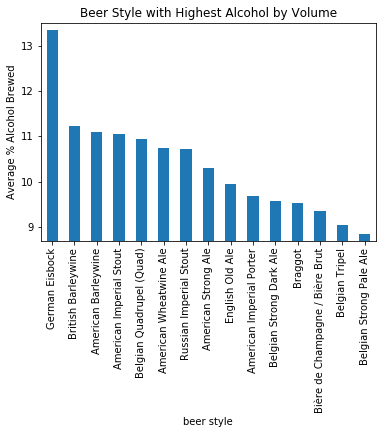

In [48]:
plot = df.groupby('style')['abv'].mean().nlargest(15).plot(kind='bar',
                                                          title ='Beer Style with Highest Alcohol by Volume',
                                                          ylim=(8.7,13.5))
plot.set_ylabel('Average % Alcohol Brewed')
plot.set_xlabel('beer style')

#맥주에 따라서 look, smell, taste, feel, overall, score값을 평균하여 15개를 순위대로 나열하였습니다.

Text(0.5, 0, 'Style')

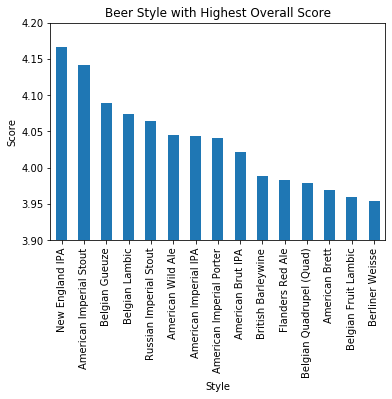

In [34]:
plot = df.groupby('style')['overall'].mean().nlargest(15).plot(kind='bar',
                                                              title = 'Beer Style with Highest Overall Score',
                                                              ylim=(3.9,4.2))
plot.set_ylabel('Score')
plot.set_xlabel('Style')

#이번에는 각 항목을 평균한 점수가 아닌 score을 기준으로 15위까지 순서를 나타낸 표입니다.

Text(0.5, 0, 'Style')

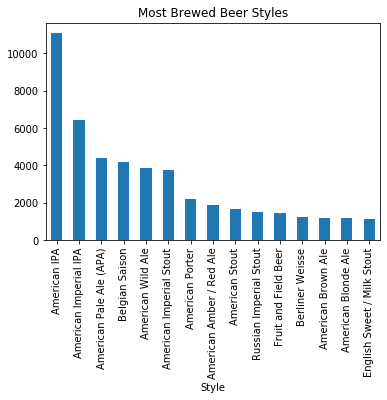

In [35]:
plot = df.groupby('style')['name'].count().nlargest(15).plot(kind='bar',
                                                            title = 'Most Brewed Beer Styles')
plot.set_xlabel('Style')

#가장 많이 평가된 맥주를 15위 순으로 나열해 보았습니다.

In [39]:
breweries_types =[]
for val in df_breweries['types']:
    try :
        types = val.split(',')
        types = [item.replace("","") for item in types]
        breweries_types.extend(types)
    except AttributeError :
        pass
    
breweries_types = set(breweries_types)
print(len(breweries_types))
breweries_types

9


{' Bar',
 ' Beer-to-go',
 ' Eatery',
 ' Homebrew',
 'Bar',
 'Brewery',
 'Eatery',
 'Homebrew',
 'Store'}

In [41]:
def split_type_brewery(val):
    try:
        if val.find(g) >-1:
            return 1
        else:
            return 0
    except AttributeError:
        return 0
    
for g in breweries_types:
    df_breweries[g] = df_breweries['types'].apply(split_type_brewery)
    
df_breweries

,name,city,state,country,notes,types,Bar,Eatery,Homebrew,Beer-to-go,Homebrew,Bar,Eatery,Store,Brewery
id,,,,,,,,,,,,,,,
19730,Brouwerij Danny,Erpe-Mere,NaN,BE,No notes at this time.,Brewery,0,0,0,0,0,0,0,0,1
32541,Coachella Valley Brewing Co,Thousand Palms,CA,US,No notes at this time.,"Brewery, Bar, Beer-to-go",1,0,0,1,0,1,0,0,1
44736,Beef 'O' Brady's,Plant City,FL,US,No notes at this time.,"Bar, Eatery",0,1,0,0,0,1,1,0,0
23372,Broadway Wine Merchant,Oklahoma City,OK,US,No notes at this time.,Store,0,0,0,0,0,0,0,1,0
35328,Brighton Beer Dispensary (DUPLICATE),Brighton,GB2,GB,Duplicate of https://www.beeradvocate.com/beer...,"Bar, Eatery",0,1,0,0,0,1,1,0,0
31561,Teddy's Tavern,Seattle,WA,US,No notes at this time.,"Bar, Beer-to-go",0,0,0,1,0,1,0,0,0
35975,Modus Operandi Brewing Co.,Mona Vale,NaN,AU,No notes at this time.,"Brewery, Bar, Eatery, Beer-to-go",1,1,0,1,0,1,1,0,1
5618,Hops! Beer Restaurant & Pizza,Riccione (RN),NaN,IT,No notes at this time.,"Brewery, Bar, Eatery",1,1,0,0,0,1,1,0,1
30916,Kelly's Cellars,Belfast,GB5,GB,No notes at this time.,Bar,0,0,0,0,0,1,0,0,0


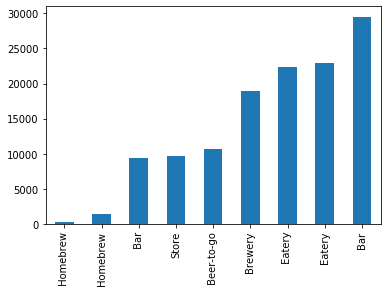

In [42]:
df_breweries[breweries_types].sum().sort_values().plot(kind='bar')

In [44]:
df_beers_active=df[df['retired']=='f']
df_beers_retired = df[df['retired']=='t']
df_beers_active

,name,brewery_id,state,country,style,availability,abv,notes,retired,look,smell,taste,feel,overall,score
id,,,,,,,,,,,,,,,
82352,Konrads Stout Russian Imperial Stout,18604,NaN,NO,Russian Imperial Stout,Rotating,10.40,No notes at this time.,f,4.119231,4.030769,4.100000,4.065385,4.073077,4.077538
166955,Leinenkugel's Ginger Shandy,710,WI,US,Fruit and Field Beer,Rotating,4.20,No notes at this time.,f,3.276210,3.304435,3.209677,3.241935,3.241935,3.248065
184151,Tasmanian Wild Ale,13670,NaN,AU,American Wild Ale,Rotating,4.90,No notes at this time.,f,4.062500,3.937500,3.760417,3.812500,3.802083,3.836667
274604,Weizen To ILL,39889,IL,US,German Hefeweizen,Rotating,5.75,No notes at this time.,f,4.000000,3.950000,3.875000,3.825000,3.900000,3.902000
55,Redhook Double Black Stout,18134,NH,US,American Imperial Stout,Rotating,7.00,Brewed with coffee.,f,4.017422,3.763066,3.869338,3.731707,3.887631,3.842683
37042,Lomond Gold,3396,GB6,GB,Scottish Ale,Year-round,5.00,No notes at this time.,f,3.250000,2.916667,2.916667,3.166667,3.166667,3.011667
175138,La Blanche De Drummond,40690,QC,CA,Belgian Witbier,Year-round,6.00,No notes at this time.,f,3.833333,3.791667,3.875000,3.666667,3.791667,3.816667
71854,Three Flowers,812,CA,US,Rye Beer,Rotating,6.50,No notes at this time.,f,3.773256,3.750000,3.813953,3.790698,3.802326,3.793256
332972,Vibin’,31805,FL,US,American Lager,Rotating,5.00,No notes at this time.,f,3.613636,3.318182,3.522727,3.636364,3.545455,3.497273


Text(0.5, 0, 'Style')

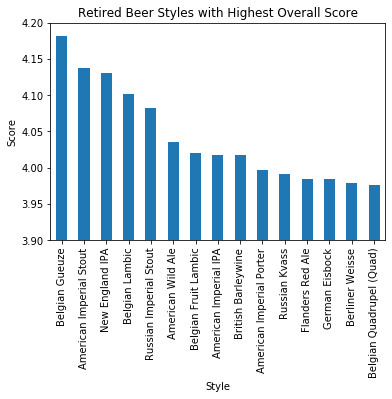

In [45]:
plot = df_beers_retired.groupby('style')['overall'].mean().nlargest(15).plot(kind='bar',
                                                                            title='Retired Beer Styles with Highest Overall Score',ylim =(3.9,4.2))
plot.set_ylabel('Score')
plot.set_xlabel('Style')

#overall항목으로, 맥주 스타일에 따라 평균한 15위의 항목(retired 된것들)

Text(0.5, 0, 'Style')

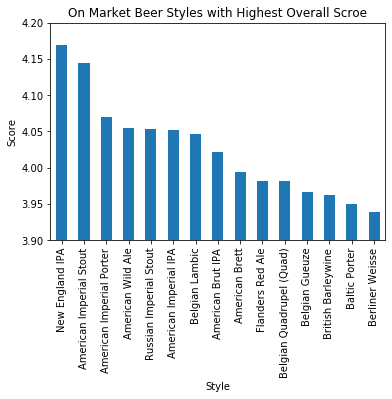

In [46]:
plot =df_beers_active.groupby('style')['overall'].mean().nlargest(15).plot(kind='bar',
                                                                          title = 'On Market Beer Styles with Highest Overall Scroe',
                                                                          ylim=(3.9,4.2))
plot.set_ylabel('Score')
plot.set_xlabel('Style')

#overall항목으로, 맥주 스타일에 따라 평균한 15위의 항목(현재 항목에 존재하는 것들)